In [2]:
import nbimporter
from statsmodels.graphics.tsaplots import plot_predict
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from notebooks.famkab_functions import number_of_observations
from notebooks.famkab_functions import complete_timestamp_day
from notebooks.famkab_functions import date_index
from notebooks.famkab_functions import solar_elevation
from notebooks.famkab_functions import clear_sky_condition
from notebooks.famkab_functions import solar_azimuth_angle
from notebooks.famkab_functions import one_day_evolution

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import statsmodels.api as sm
import seaborn as sns
import datetime
import warnings


In [3]:
# Load data from raw_data
data = np.load('../raw_data/X_train_copernicus.npz', allow_pickle=True)

In [4]:
# Extract features from data
GHI = data['GHI']
CLS = data['CLS']
SAA = data['SAA']
SZA = data['SZA']
DATE = data['datetime']

In [5]:
# printing number of observations for a specific day
number_of_observations('21-06-2012')

6

In [6]:
# printing the whole timestamp for a specific day
complete_timestamp_day(observation= date_index('31-01-2012')[0])

array([datetime.datetime(2012, 1, 31, 8, 15),
       datetime.datetime(2012, 1, 31, 8, 30),
       datetime.datetime(2012, 1, 31, 8, 45),
       datetime.datetime(2012, 1, 31, 9, 0),
       datetime.datetime(2012, 1, 31, 9, 15),
       datetime.datetime(2012, 1, 31, 9, 30),
       datetime.datetime(2012, 1, 31, 9, 45),
       datetime.datetime(2012, 1, 31, 10, 0),
       datetime.datetime(2012, 1, 31, 10, 15),
       datetime.datetime(2012, 1, 31, 10, 30),
       datetime.datetime(2012, 1, 31, 10, 45),
       datetime.datetime(2012, 1, 31, 11, 0),
       datetime.datetime(2012, 1, 31, 11, 15),
       datetime.datetime(2012, 1, 31, 11, 30),
       datetime.datetime(2012, 1, 31, 11, 45),
       datetime.datetime(2012, 1, 31, 12, 0),
       datetime.datetime(2012, 1, 31, 12, 15),
       datetime.datetime(2012, 1, 31, 12, 30),
       datetime.datetime(2012, 1, 31, 12, 45),
       datetime.datetime(2012, 1, 31, 13, 0),
       datetime.datetime(2012, 1, 31, 13, 15),
       datetime.datetime(

In [7]:
# Printing solar elevation for a specific day 
solar_elevation(
    feature = SAA, 
    observation = date_index('21-06-2012')[0])

array([10.37, 13.17, 16.  , 18.87, 21.76, 24.68, 27.62, 30.58, 33.55,
       36.53, 39.52, 42.51, 45.5 , 48.48, 51.44, 54.39, 57.3 , 60.16,
       62.97, 65.67, 68.25, 70.64, 72.77, 74.52, 75.74, 76.3 , 76.12,
       75.22, 73.72, 71.77, 69.5 , 67.  , 64.36, 61.6 , 58.76, 55.87,
       52.94, 49.99, 47.01, 44.03, 41.04, 38.05, 35.06, 32.09, 29.12,
       26.17, 23.24, 20.34])

In [8]:
# Print solar azimuth angle for a specific day 
solar_azimuth_angle(
    feature = SZA,
    observation = date_index('21-06-2012')[0])

array([ 68.38,  70.42,  72.43,  74.43,  76.41,  78.39,  80.38,  82.4 ,
        84.44,  86.54,  88.7 ,  90.96,  93.33,  95.85,  98.55, 101.51,
       104.77, 108.44, 112.64, 117.54, 123.37, 130.43, 139.07, 149.63,
       162.2 , 176.3 , 190.76, 204.22, 215.81, 225.4 , 233.21, 239.62,
       244.96, 249.5 , 253.42, 256.88, 259.98, 262.8 , 265.41, 267.85,
       270.16, 272.37, 274.5 , 276.57, 278.6 , 280.6 , 282.58, 284.56])

In [9]:
# Print GHI under clean sky conditions for a specific day 
clear_sky_condition(feature = CLS,
    observation = date_index('21-06-2012')[0])

array([ 132.52,  180.58,  230.71,  282.09,  334.13,  386.32,  438.24,
        489.54,  539.88,  588.97,  636.53,  682.31,  726.07,  767.54,
        806.5 ,  842.81,  876.28,  906.76,  934.09,  958.16,  978.84,
        996.05, 1009.69, 1019.7 , 1026.05, 1028.67, 1027.55, 1022.73,
       1014.22, 1002.07,  986.34,  967.1 ,  944.45,  918.49,  889.35,
        857.18,  822.12,  784.4 ,  744.2 ,  701.68,  657.04,  610.52,
        562.37,  512.84,  462.23,  410.84,  359.02,  307.14])

In [10]:
# storing in new variables
clear_sky = clear_sky_condition(feature = CLS,observation = date_index('21-06-2012')[0])
elevation = solar_elevation(feature = SAA, observation = date_index('21-06-2012')[0])
azimuth = solar_azimuth_angle(feature = SZA,observation = date_index('21-06-2012')[0])
timestamps = complete_timestamp_day(observation= date_index('21-06-2012')[0])

## Polynomial Regression

### Plotting features

#### The Solar angles features represent the position of the sun
#### The Solar Zenith angle measures the angle between the line of sight and the vertical line
#### Note: imagine the line of sight as the imaginary line when we look at the sun
#### The Solar Azimuth angle represent the movement of the sun on the horizon
#### The Solar Elevation Angle represents the height of the sun
#### We will see if this features are correlated with CLS - clear sky

In [11]:
# Displaying one observation
one_day_evolution('CLS', '21-06-2012')

The radiation on 21-06-2012 was 25469806.589999996 W/m².


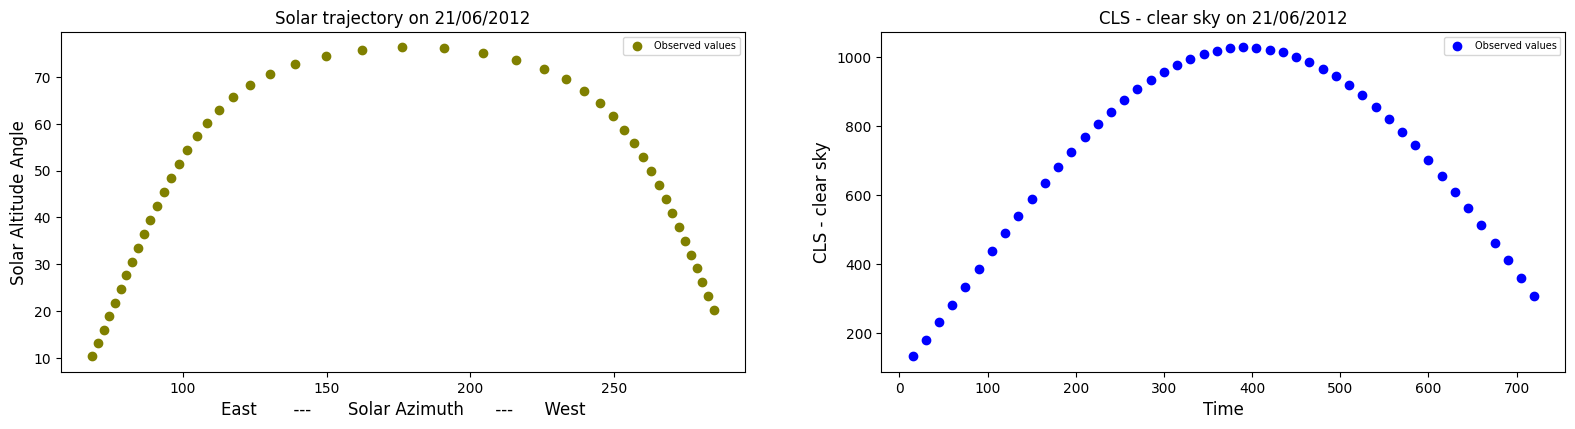

In [157]:
# to avoid a warning message 
warnings.filterwarnings("ignore")
# CHANGE THE FOLLOWING CODE
plt.figure(figsize=(30,15))

gs = gridspec.GridSpec(3, 3)
ax1 = plt.subplot(gs[1, 0])
ax2 = plt.subplot(gs[1, -2])

# 1st subplot
ax1.scatter(azimuth, elevation , color='olive', label='Observed values')
ax1.set_title("Solar trajectory on 21/06/2012",fontsize=12)
ax1.set_xlabel("East       ---       Solar Azimuth      ---      West", fontsize = 12)
ax1.set_ylabel("Solar Altitude Angle", fontsize = 12)
ax1.legend(loc='upper right',fontsize=7);
# 2nd subplot
ax2.scatter(np.linspace(15, 720, num=48),clear_sky, color='blue', label='Observed values')
ax2.set_title("CLS - clear sky on 21/06/2012",fontsize=12)
ax2.set_xlabel("Time", fontsize = 12)
ax2.set_ylabel("CLS - clear sky", fontsize = 12)
ax2.legend(loc='upper right',fontsize=7);

### Heatmap

<AxesSubplot: >

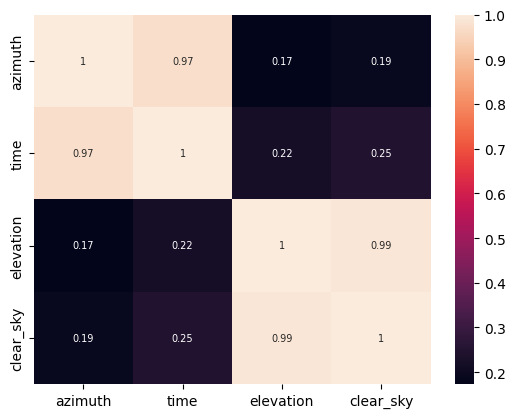

In [176]:
df = pd.DataFrame({'azimuth':azimuth,'time': np.linspace(15, 720, num=48),'elevation': elevation, 'clear_sky': clear_sky})
sns.heatmap(df.corr(), annot=True, annot_kws={"size": 7})

#### We can see that time and Azimuth angle are highly correlated 
#### One can see that CLS and Solar Elevations are highly correlated too
#### Then we can neglect or not use in these solar angles and CLS - uunder clear ske - features inpur model


In [13]:
# Storing the variables in a dataframe
features_analysis = pd.DataFrame({'azimuth':azimuth,'elevation': elevation, 'clear_sky': clear_sky})

In [14]:
# Defining the training and the test data
x_solar_features, y_clear_sky = features_analysis[["azimuth", "elevation"]], features_analysis["clear_sky"]
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(x_solar_features)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y_clear_sky, test_size=0.3, random_state=42)

In [15]:
# let’s create and fit our model
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train);

In [16]:
# model performs on previously unseen data
poly_reg_y_predicted = poly_reg_model.predict(X_test)


In [17]:
# coefficient of determination) regression score function.
r_sq_poly = r2_score(np.array(y_test).reshape(-1, 1), np.array(poly_reg_y_predicted).reshape(-1, 1))
print(f"Multi-Dimension Polynomial Regression - Coefficient Of Determination: {r_sq_poly}")

Multi-Dimension Polynomial Regression - Coefficient Of Determination: 0.9995974954970427


In [18]:
# plotting purpose 
x_solar_features, y_clear_sky = features_analysis[["azimuth", "elevation"]], features_analysis["clear_sky"]
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(x_solar_features)
# let’s create and fit our model
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, features_analysis['clear_sky']);
# model performs on previously unseen data
poly_reg_y_predicted_2 = poly_reg_model.predict(poly_features)

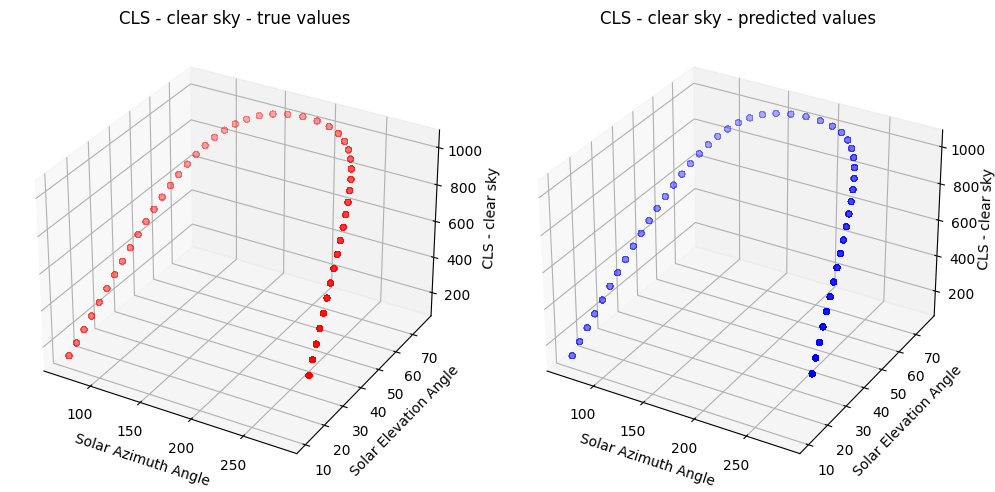

In [107]:
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import get_test_data

# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.47))

# =============
# First subplot
# =============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo
X = features_analysis['azimuth']
Y = features_analysis['elevation']
Z = np.array(features_analysis['clear_sky']).reshape((-1, 1))
Z_pred = poly_reg_y_predicted_2.reshape((-1, 1))

ax.scatter(X, Y, Z,c='r', marker='o', linewidth=0.1, antialiased=False)
# title
ax.set_title('CLS - clear sky - true values')
# Set axis labels
ax.set_xlabel('Solar Azimuth Angle ')
ax.set_ylabel('Solar Elevation Angle')
ax.set_zlabel('CLS - clear sky')

# ==============
# Second subplot
# ==============

# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
ax.scatter(X, Y, Z_pred, c='b', marker='o',linewidth=0.1, antialiased=False)
# title
ax.set_title('CLS - clear sky - predicted values')
# Set axis labels
ax.set_xlabel('Solar Azimuth Angle')
ax.set_ylabel('Solar Elevation Angle')
ax.set_zlabel('CLS - clear sky',labelpad=0.2)

plt.subplots_adjust(left=0.1, bottom=None, right=0.9, top=1, hspace=0.5)
plt.tight_layout()
plt.show()

## Conclusion

### Solar Azimuth Angle seems to be highly correlated with GHI under clean sky 
### Solar Elevation Angle seems to be highly correlated with GHI under clean sky 
### So the irrandiance levels on the ground will have a high correlation with the solar movements throughout the day
### When we do not consider anyother factors e.g.clouds 